<a id='BacktoTop'></a>

### SMU NLP Course (DS7337) -- Homework 03 submission  (06-10-2019)
### Shanqing Gu (Class 401)

###  Table of Contents 

#### 1. [Edit Distance Calculation](#edc1) 
#### 2. [Remove Stopwords](#rsw2)
#### 3. [Compare Stemmers](#cs3)

In [1]:
## import libraries and update parameters for matplotlab and seaborn

import pandas as pd
import numpy as np

import copy

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import LancasterStemmer
from nltk.stem import RegexpStemmer


import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

import seaborn as sns
sns.set(style="dark")

<a id='edc1'></a>
#### Q1: Edit Distance Calculation
Compare your given name with your nickname (if you don’t have a nickname, invent one for this assignment) by answering the following questions:

a.	What is the edit distance between your nickname and your given name?

b.	What is the percentage string match between your nickname and your given name?

Show your work for both calculations.


[Back to top](#BacktoTop)

#### Q1.1: python codes

In [2]:
## function levenshteinDistance() to get the edit sistance
## reference: https://rosettacode.org/wiki/Levenshtein_distance
## also can be shown with matrices (Sarkar book chapter 6: text Similarity and CluStering, p294 of 397)

def levenshteinDistance(str1, str2):
    f = len(str1)
    n = len(str2)
    fn_sum = float(f + n)
    d = []           
    for i in range(f+1):
        d.append([i]) 
    del d[0][0]   
        
    for j in range(n+1):
        d[0].append(j)  
        
    for j in range(1,n+1):
        for i in range(1,f+1):
            if str1[i-1] == str2[j-1]:
                d[i].insert(j,d[i-1][j-1])           
            else:
                minimum = min(d[i-1][j]+1, d[i][j-1]+1, d[i-1][j-1]+2)         
                d[i].insert(j, minimum)
                
    leven_dist = d[-1][-1]
    
    pct = (fn_sum - leven_dist)/fn_sum
    
    return {'Edit distance': leven_dist, 'Percentage for string match between nickname and given name': pct}

In [3]:
## givenname: "Shanqing", and nickname: "Shan"
## get edit distance and string match percentage from levenshteinDistance()
print(levenshteinDistance("Shanqing","Shan")) 
print(levenshteinDistance("Shan","Shanqing")) 

{'Edit distance': 4, 'Percentage for string match between nickname and given name': 0.6666666666666666}
{'Edit distance': 4, 'Percentage for string match between nickname and given name': 0.6666666666666666}


#### Q1.2: Summary for Edit Distance

Edit distance, also known as "levenshtein Edit Distance", is to measure how near or far a word is from the input word. 

The edit distance for my given name "shanqing" and nickname "shan" is 4, and the percentage for string match between nickname and given name is 0.67. The distance between these two words is same as that when both strings are reversed.

<a id='rsw2'></a>
#### Q2: Removing Stopwords 

Find a friend (or family member or classmate) who you know has read a certain book. Without your friend knowing, copy the first two sentences of that book. Now rewrite the words from those sentences, excluding stop words. Now tell your friend to guess which book the words are from by reading them just that list of words. Did you friend correctly guess the book on the first try? What did he or she guess? Explain why you think you friend either was or was not able to guess the book from hearing the list of words. 

[Back to top](#BacktoTop)

#### Q2.1: python codes

In [4]:
## the first 2 setences from book "the lion king"
sentence = "From the smallest ant to the largest elephant, every living thing has a place in the great Circle of Life. Mufasa’s place was as king of the lions."

In [5]:
## tokenize_text() to tokenize text, refer to the page of 190 in Chapter 4.
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    return tokens

In [6]:
## remove_stopwords() to remove stopwords in tokens, as referenced from page 136 of 397 (Chapter 3)
def remove_stopwords(tokens):
    stopword_list = nltk.corpus.stopwords.words('english') # a list of stopwords for English from nltk
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    return filtered_tokens

In [7]:
## tokenize text with tokenize_text()
tokens =[]
tokens = tokenize_text(sentence.lower()) 
## tokens

In [8]:
## remove the necessary stopwords with remove_stopwords() function
remove_stw = remove_stopwords(tokens)
## remove_stw

In [9]:
## clean tokens with removing punctuations
clean_tokens = [word for word in remove_stw if word.isalpha()]
clean_tokens

['smallest',
 'ant',
 'largest',
 'elephant',
 'every',
 'living',
 'thing',
 'place',
 'great',
 'circle',
 'life',
 'mufasa',
 'place',
 'king',
 'lions']

#### Q2.2: Summary for removing stopwords
Stopwords are words that have little or no significance. They are usually removed from text during processing in order to retain words having maximum significance and context. Words like "from", "a", "the" and so on are stopwords. Each domain of language may have its own set of stopwords.

For this question, the answer is "yes". My friend could recognize the sentences are from book "The Lion King" by just reading the collected tokens.

The cleaned tokens are: ['smallest', 'ant', 'largest', 'elephant', 'every', 'living', 'thing', 'place', 'great', 'circle', 'life', 'mufasa', 'place', 'king', 'lions']

<a id='cs3'></a>
#### Q3: Compare Stemmers

Run one of the stemmers available in Python. Run the same two sentences from question 2 above through the stemmer and show the results. How many of the outputted stems are valid morphological roots of the corresponding words? Express this answer as a percentage.

[Back to top](#BacktoTop)

#### Q3.1: python codes

In [10]:
## get_stems function for 5 different stemmers
def get_stems(phrase, method):
    
    ps = nltk.stem.PorterStemmer()
    ss = nltk.stem.SnowballStemmer('english')
    wnl = nltk.wordnet.WordNetLemmatizer()
    lans = nltk.stem.LancasterStemmer()
    rs = nltk.stem.RegexpStemmer('ing$|s$|ed$', min=4)
    
    words_to_stem = remove_stopwords(phrase)

    stems = [w for w in words_to_stem]
    stems = []
    
    if method == 'porter' :
        for w in words_to_stem:
            stems.append(ps.stem(w))
 
    elif method == 'snowball': 
        for w in words_to_stem:
            stems.append(ss.stem(w))
            
    elif method == 'lemmatize': 
        for w in words_to_stem:
            stems.append(wnl.lemmatize(w))
            
    elif method == 'Lancaster': 
        for w in words_to_stem:
            stems.append(lans.stem(w)) 
            
    elif method == 'Regexp': 
        for w in words_to_stem:
            stems.append(rs.stem(w))

    return (stems)

In [11]:
## get the stems with 5 Stemmer methods
PorterStemmer = get_stems(clean_tokens, 'porter')
SnowballStemmer = get_stems(clean_tokens, 'snowball')
WordNetLemmatizer = get_stems(clean_tokens, 'lemmatize')
LancasterStemmer = get_stems(clean_tokens, 'Lancaster')
RegexpStemmer = get_stems(clean_tokens, 'Regexp')

In [12]:
## compare the outputted stems with 5 different stemmers
stemmers_comp = pd.DataFrame({"Clean Tokens":clean_tokens,
                             "PortersStemmer": PorterStemmer, 
                             "SnowballStemmer": SnowballStemmer,
                             "WordNetLemmatizer": WordNetLemmatizer,
                             "LancasterStemmer":LancasterStemmer,
                             "RegexpStemmer": RegexpStemmer
                            })
## show results
stemmers_comp

,Clean Tokens,PortersStemmer,SnowballStemmer,WordNetLemmatizer,LancasterStemmer,RegexpStemmer
0,smallest,smallest,smallest,smallest,smallest,smallest
1,ant,ant,ant,ant,ant,ant
2,largest,largest,largest,largest,largest,largest
3,elephant,eleph,eleph,elephant,eleph,elephant
4,every,everi,everi,every,every,every
5,living,live,live,living,liv,liv
6,thing,thing,thing,thing,thing,th
7,place,place,place,place,plac,place
8,great,great,great,great,gre,great
9,circle,circl,circl,circle,circ,circle


In [13]:
# PortersStemmer
n = stemmers_comp.shape[0] # get total number of outputted stems
iv_p = 5
v_p_pct = 100*(n-iv_p)/n # calculate the precentage of valid roots
print("Percentage of valid roots from PortersStemmer:", v_p_pct, "%")

# SnowballStemmer
iv_s = 5
v_s_pct = 100*(n-iv_s)/n
print("Percentage of valid roots from SnowballStemmer:", v_s_pct, "%")

# WordNetLemmatizer
iv_w = 2
v_w_pct = 100*(n-iv_w)/n
print("Percentage of valid roots from WordNetLemmatizer:", v_w_pct, "%")

# LancasterStemmer
iv_l = 10
v_l_pct = 100*(n-iv_l)/n
print("Percentage of valid roots from LancasterStemmer:", v_l_pct, "%")

# RegexpStemmer
iv_r = 5
v_r_pct = 100*(n-iv_r)/n
print("Percentage of valid roots from RegexpStemmer:", v_r_pct, "%")

Percentage of valid roots from PortersStemmer: 66.66666666666667 %
Percentage of valid roots from SnowballStemmer: 66.66666666666667 %
Percentage of valid roots from WordNetLemmatizer: 86.66666666666667 %
Percentage of valid roots from LancasterStemmer: 33.333333333333336 %
Percentage of valid roots from RegexpStemmer: 66.66666666666667 %


In [14]:
## compile the stemmer names and values with DataFrame
data = {'Stemmer_Name': ['PortersStemmer', 'SnowballStemmer', 'WordNetLemmatizer', 'LancasterStemmer', 'RegexpStemmer'],
     'Valid_Percentage': [v_p_pct, v_s_pct, v_w_pct, v_l_pct, v_r_pct]}

df = pd.DataFrame(data=data)
df

,Stemmer_Name,Valid_Percentage
0,PortersStemmer,66.666667
1,SnowballStemmer,66.666667
2,WordNetLemmatizer,86.666667
3,LancasterStemmer,33.333333
4,RegexpStemmer,66.666667


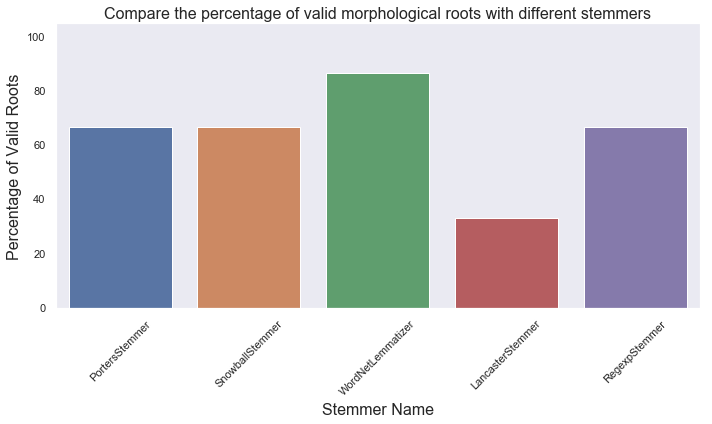

In [15]:
## Compare the percentage of valid morphological roots with different stemmers
## plot with sns.barplot

plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)

sns.barplot(x ='Stemmer_Name', y = "Valid_Percentage", data=df)

plt.ylim(0, 105)
plt.title('Compare the percentage of valid morphological roots with different stemmers',fontsize = '16')
plt.xlabel('Stemmer Name', fontsize = 16)
plt.ylabel('Percentage of Valid Roots', fontsize = 16)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.savefig('stemmer_comp.png') 
plt.tight_layout()

#### Q3.2: Summary for Compare Stemmers

PorterStemmer is used most frequently. RegexpStemmer is based on user-defined rules, and SnowballStemmer supports stemming in 13 different languages besides English. The performances for these 3 Stemmers are equally better than that of LancasterStemmer. The performance can be calculated from the percentage of valid morphological roots.

The process of lemmatization is very similar to stemming. The difference is that the root stem may not always be a lexicographically correct word, while the root word (lemma) will always be present in the dictionary. A robust lemmatization module that uses WordNet and the word’s syntax and semantics to get the root word or lemma.

As shown in the barplot for stemmer comparison, it seems lemmatization works better than other 4 Stemmers because one additional step is involved where a lemma is formed by removing the affix from the word if and only if the lemma is present in the dictionary.

-- The End of Homework 03 --